## TO DO
**Ask Kainat for support on the following:**
- Setup new Docker job specifically for ipynb of this lesson

# Advanced pandas - Going Beyond the Basics

## DataFrame Table Styles
___

#### Table of Contents
1. [Import dependencies](#section1)
2. [Import dataset](#section2)
3. [View Styler object](#section3)
4. [Text formatting](#section4)
5. [Conditional formatting with built-in styles](#section5)
6. [Style customization with CSS](#section6)
7. [Export styled tables](#section7)

___
<a id='section1'></a>
## (1) Import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Check pandas version (ensure it is pandas v2 and above)
pd.__version__

'2.0.3'

___
<a id='section2'></a>
## (2) Import dataset
- Data Source: https://www.kaggle.com/datasets/datascientistanna/customers-dataset (Database Contents License (DbCL) v1.0)

In [2]:
# Import and read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/kennethleungty/Educative-Advanced-Pandas/main/data/csv/Customers_Mini.csv')

# Set CustomerID as index
df = df.set_index('CustomerID')

# View DataFrame
df

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


___
<a id='section3'></a>
## (3) View Styler object

We saw earlier in the Introduction section that the `df.style` attribute produces a `Styler` object. We can view it with the code below:

In [3]:
df.style

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


In [4]:
type(df.style)

pandas.io.formats.style.Styler

The output above shows that the `Styler` object returns the same DataFrame table, but its data type is no longer the original `pandas.core.frame.DataFrame`, and is instead `pandas.io.formats.style.Styler`

___
<a id='section4'></a>
## (4) Text formatting
https://pandas.pydata.org/docs/user_guide/style.html#Formatting-Values

### (i) Data

Let us first explore how to adjust the formatting display of the values in DataFrame cells. To control the display of these values, we can use the `format()` method. It contains different parameters that define the format specification (which are strings that express how the data should be presented). It works by assigning a formatting function (known as `formatter`) to each cell in the DataFrame.

For instance, we can apply a generic formatting on the entire DataFrame to convert floats to having a precision of 3, set the decimal point separator as a comma, and set the thousand separator as a period, as shown below:

In [5]:
df.style.format(precision=3, thousands='.', decimal=',') 

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15.000,39,Scientist,1,4
2,Male,21,35.000,81,Engineer,3,3
3,Female,20,86.000,6,Engineer,1,1
4,Female,23,59.000,77,Lawyer,0,2
5,Female,31,38.000,40,Artist,2,6
6,Female,22,58.000,76,Engineer,0,2
7,Female,35,31.000,6,Scientist,1,3


The output above shows that the formatting of the values in the "AnnualIncome" column has been modified accordingly. It is because the "AnnualIncome" column is the only one with values in the thousands range. However, an important thing to note is that the underlying data type is unchanged, as shown below where "AnnualIncome" continues to have the `int64` data type:

In [6]:
df.dtypes

Gender            object
Age                int64
AnnualIncome       int64
SpendingScore      int64
Profession        object
WorkExperience     int64
FamilySize         int64
dtype: object

The `precision`, `thousands`, and `decimal` parameters are just some examples of the parameters native to the `format()` method. The following information explains the various parameters that we can leverage in `format()`:

- `subset`: Defines the columns to apply the formatting function to.
- `na_rep`: Sets the representation for missing values. If `None` (default), no special formatting will be applied.
- `precision`: Floating point precision for the numerical values.
- `decimal`: Character used as the separator for the decimal points.
- `thosands`: Character used as the separate for the thousands value. Default value is `None`.
- `escape`: Defines the method for escaping special characters. Passing `'html'` and `'latex'` will replace the special characters with HTML-safe and LaTeX-safe sequences respectively.
- `hyperlinks`: Converts hyperlink-like string patterns into clickable links. Passing `'html'` and `'latex'` will set clickable URL hyperlinks and LaTeX href commands respectively.

Besides `precision` (default value is 6) and `decimal` (default character is `.`), the other parameters have a default value of `None`.

We can also apply a different format specification for each column by providing dictionaries, as seen in the example below:

In [7]:
df.style.format({
               'WorkExperience': '{:,.2f}', # format as float rounded to 2 decimal places
               'SpendingScore': '{:.1%}',  # format as percentage rounded to 1 decimal place
               'AnnualIncome': '{:,}',    # format with comma as thousand separator
               'Gender': '{}'  # format as string
                })

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,"15,000",3900.0%,Scientist,1.00,4
2,Male,21,"35,000",8100.0%,Engineer,3.00,3
3,Female,20,"86,000",600.0%,Engineer,1.00,1
4,Female,23,"59,000",7700.0%,Lawyer,0.00,2
5,Female,31,"38,000",4000.0%,Artist,2.00,6
6,Female,22,"58,000",7600.0%,Engineer,0.00,2
7,Female,35,"31,000",600.0%,Scientist,1.00,3


The example above shows that each key-value pair of the dictionary corresponds to a column and its respective format specification, which are strings that define how the data should be presented. 

Let us look at another example. Suppose we now make introduce some null values into our dataset. We can then perform a different set of formatting as shown below:

In [8]:
# Generate df with NaN values
total_values = df.size
n_nulls = 5
df_nan = df.copy()
rows = np.random.choice(df_nan.index, n_nulls)
cols = np.random.choice(df_nan.columns, n_nulls)

# Replace chosen locations with NaN
for row, col in zip(rows, cols):
    df_nan.at[row, col] = np.nan

# View output
df_nan

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19.0,15000.0,39,Scientist,1,4
2,Male,21.0,35000.0,81,Engineer,3,3
3,Female,20.0,86000.0,6,Engineer,1,1
4,Female,NaN,NaN,77,Lawyer,0,2
5,Female,31.0,38000.0,40,Artist,2,6
6,NaN,22.0,NaN,76,Engineer,0,2
7,Female,35.0,31000.0,6,Scientist,1,3


In [9]:
# Apply formatting
func = lambda s: 'JOB' if isinstance(s, str) else 'NO JOB'

# Perform series of formatting changes
df_nan.style.format({'Age': '{:.1f}', 
                     'Profession': func}, 
                     na_rep='MISSING')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19.0,15000.000000,39,JOB,1,4
2,Male,21.0,35000.000000,81,JOB,3,3
3,Female,20.0,86000.000000,6,JOB,1,1
4,Female,MISSING,MISSING,77,JOB,0,2
5,Female,31.0,38000.000000,40,JOB,2,6
6,MISSING,22.0,MISSING,76,JOB,0,2
7,Female,35.0,31000.000000,6,JOB,1,3


The output above shows that we have performed the following formatting changes:
- Set values in "Age" column to be displayed as 1 decimal place. The `.1` means we want to round the number to 1 decimal place.
- Replace non-null values in "Profession" column with the string "JOB" using custom lambda function
- Replace null values in entire DataFrame with the string "MISSING"

If the code for defining formatting looks familiar, it is because the `pandas` `format()` method is related to Python's string format syntax, where they both use the same underlying mechanics to format the representation of numbers.

For example, the following Python code format using replacement fields surrounded by curly braces {}, where we convert a float into numerical dollar value with 2 decimal places:

In [10]:
# Convert number into numerical dollar value with 2 decimal places and comma as thousands separator
x = 1012.3456
print('${:,.2f}'.format(x))

$1,012.35


The same concept is applied when we perform the same conversion for the values in the "AnnualIncome" column, as seen below:

In [11]:
# Format the annual income column
df.style.format({'AnnualIncome': '${:,.2f}'})

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,"$15,000.00",39,Scientist,1,4
2,Male,21,"$35,000.00",81,Engineer,3,3
3,Female,20,"$86,000.00",6,Engineer,1,1
4,Female,23,"$59,000.00",77,Lawyer,0,2
5,Female,31,"$38,000.00",40,Artist,2,6
6,Female,22,"$58,000.00",76,Engineer,0,2
7,Female,35,"$31,000.00",6,Scientist,1,3


We can see from the output that each number in the DataFrame column is displayed with two decimal places, commas as thousand separators, and prefixed by a dollar sign.

### (ii) Index
Besides formatting the data within the DataFrame cells, we have methods to format the text display value of index labels or column headers too. These methods are namely `format_index()` and `relabel_index()`.

For example, we can uppercase all the column headers with `format_index()`, as shown below:

In [12]:
df.style.format_index(lambda v: str.upper(v), # String uppercase
                        axis=1 # Represents columns (axis=1)
                      )

,GENDER,AGE,ANNUALINCOME,SPENDINGSCORE,PROFESSION,WORKEXPERIENCE,FAMILYSIZE
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


The `format_index()` method has parameters similar to `format()`, except that it has additional parameters like `axis` and `level` to determine the specific way these indices are modified.

For renaming of index labels or column headers, we can use the `relabel_index()` method. For instance, the example below shows how we can use it to rename the index labels (which are the customer IDs):

In [13]:
# Relabel the values in the index (CustomerID)
df.style.relabel_index([f'Customer{i+1}' for i in range(7)], 
                        axis=0 # Represents index (axis=0)
                       )

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
Customer1,Male,19,15000,39,Scientist,1,4
Customer2,Male,21,35000,81,Engineer,3,3
Customer3,Female,20,86000,6,Engineer,1,1
Customer4,Female,23,59000,77,Lawyer,0,2
Customer5,Female,31,38000,40,Artist,2,6
Customer6,Female,22,58000,76,Engineer,0,2
Customer7,Female,35,31000,6,Scientist,1,3


### (iii) Hide

We can use the `hide()` method to hide certain columns, the index and/or column headers, or index names.

The index can be hidden from rendering by calling `hide()` without any arguments, which might be useful if your index is integer based. Similarly column headers can be hidden by calling `hide(axis="columns")` without any other arguments.

For example, we can hide the "Age" and "Gender" columns from being displayed, as shown below:

In [14]:
# Hide Age and Gender columns
df.style.hide(subset=['Age', 'Gender'],
                      axis='columns' # We can also use axis=1 
                      )

,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,
1,15000,39,Scientist,1,4
2,35000,81,Engineer,3,3
3,86000,6,Engineer,1,1
4,59000,77,Lawyer,0,2
5,38000,40,Artist,2,6
6,58000,76,Engineer,0,2
7,31000,6,Scientist,1,3


We can even chain this `hide()` method with the methods we learned earlier, such as `relabel_index()`. For example, we can first hide the "Age" and "Gender columns, before renaming the rest, as demonstrated below:

In [15]:
# Chaining of methods for styling
df.style.hide(['Age', 'Gender'], axis=1)\
        .relabel_index(['A', 'B', 'C', 'D', 'E'], axis=1)

,A,B,C,D,E
CustomerID,,,,,
1,15000,39,Scientist,1,4
2,35000,81,Engineer,3,3
3,86000,6,Engineer,1,1
4,59000,77,Lawyer,0,2
5,38000,40,Artist,2,6
6,58000,76,Engineer,0,2
7,31000,6,Scientist,1,3


### (iv) Concatenate

We can also use the `concat()` method to append another `Styler` object for combining output into a single table. Two or more `Styler` objects can be concatenated together provided they share the same columns. 

The purpose of this method is to extend existing styled DataFrame with other metrics that may be useful but may not conform to the original's structure. It could be for common use cases such as  adding a sub total row, or displaying metrics such as means, variance or counts.

Suppose we first subset the original DataFrame into only the numerical columns (i.e., "Age", "AnnualIncome", "SpendingScore", "WorkExperience", and "FamilySize". With that, we then generate the mean value for each column as shown below:

In [16]:
# Subset into numerical columns only
df_subset = df[["Age", "AnnualIncome", "SpendingScore", "WorkExperience", "FamilySize"]]

# Obtain mean value for each numerical column with agg() method
df_mean = df_subset.agg('mean').to_frame(name='Mean').T

# View output
df_mean

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
Mean,24.428571,46000.0,46.428571,1.142857,3.0


We can then concatenate the `Styler` object version of both DataFrames (the original DataFrame and the DataFrame with summary statistics we generated above):

In [17]:
# Subset to numerical columns
df_subset = df[["Age", "AnnualIncome", "SpendingScore", "WorkExperience", "FamilySize"]]

# Concatenate Styler objects (obtained with .style) of DataFrames
df_subset.style.concat(df_mean.style)

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
CustomerID,,,,,
1,19,15000,39,1,4
2,21,35000,81,3,3
3,20,86000,6,1,1
4,23,59000,77,0,2
5,31,38000,40,2,6
6,22,58000,76,0,2
7,35,31000,6,1,3
Mean,24.428571,46000.000000,46.428571,1.142857,3.000000


The output shows how we have performed concatenation such that summary statistics has been easily appended to the original DataFrame as part of the output display.

> **Note**: The other Styler object to be appended in the concatenation must have the same columns as the original.

We can also perform independent formatting on each `Styler` object before the concatenation, as shown below:

In [18]:
# Independently format Styler objects and then concatenate
df_subset.style.format({'AnnualIncome': '${:,.2f}'})\
               .concat(df_mean.style.format('{:.1f}') # 1 decimal place
                )

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
CustomerID,,,,,
1,19,"$15,000.00",39,1,4
2,21,"$35,000.00",81,3,3
3,20,"$86,000.00",6,1,1
4,23,"$59,000.00",77,0,2
5,31,"$38,000.00",40,2,6
6,22,"$58,000.00",76,0,2
7,35,"$31,000.00",6,1,3
Mean,24.4,46000.0,46.4,1.1,3.0


___
<a id='section5'></a>
## (5) Conditional formatting with built-in styles

Having focused on styling the text and numerical values in the DataFrame cells earlier, let us now take a look at how we can incorporate colors and highlights into the table styling.

In particular, we will start by looking at several styling functions that are common enough such that they have been built into the `Styler` objects. It means that we can easily utilize them without requiring to write custom functions for those specific styles.

These built-in styles tend to be what we call **conditional formatting**, as their visual display is dependent on the values in the tables. Let us explore how each of these built-in styles works:

### Null

The `highlight_null()` function allows us to easily highlight and identify missing and null data in the DataFrame, as shown below:

In [19]:
# Generate df with NaN values
total_values = df.size
n_nulls = 5
df_nan = df.copy()
rows = np.random.choice(df_nan.index, n_nulls)
cols = np.random.choice(df_nan.columns, n_nulls)

# Replace chosen locations with NaN
for row, col in zip(rows, cols):
    df_nan.at[row, col] = np.nan

In [20]:
# Highlight null values with defined color
df_nan.style.highlight_null(color='yellow')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19.000000,nan,39.000000,Scientist,1.000000,4
2,Male,nan,35000.000000,nan,Engineer,3.000000,3
3,Female,20.000000,86000.000000,6.000000,Engineer,1.000000,1
4,Female,23.000000,59000.000000,77.000000,Lawyer,0.000000,2
5,Female,31.000000,38000.000000,40.000000,Artist,nan,6
6,Female,22.000000,58000.000000,76.000000,Engineer,nan,2
7,Female,35.000000,31000.000000,6.000000,Scientist,1.000000,3


### Minimum and maximum

We can use `highlight_min()` and `highlight_max()` to identifying extremities in numerical data, as demonstrated below:

In [21]:
# Highlight minimum values with defined color
df.style.highlight_min(color='orange')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


In [22]:
# Highlight maximum values with defined color
df.style.highlight_max(color='green')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


An interesting point to note is that these methods also apply to string values, where strings closest to the start (for minimum) or the end (for maximum) of the alphabet are highlighted.

As described earlier, the styling of these tables involves CSS. As such, here is an example where we provide more detailed specifications on how the output should be displayed. In particular, we leverage the `props` parameter to set the CSS properties to use for highlighting.

In [23]:
# Highlight maximum values with custom CSS properties
df.style.highlight_max(props='color:white; font-weight:bold; \
                              background-color:blue;')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


> **Note**: When values are passed into `props`, the `color` parameter will not be used.

### Quantiles

`highlight_quantile()` is useful for detecting the highest or lowest percentile values based on our specifications. It only works on numerical values, so we need to define the subset of numerical columns to operate on.

In [24]:
# Define numerical cols
numerical_cols = ["Age", "AnnualIncome", "SpendingScore", "WorkExperience", "FamilySize"]

# Highlight values belonging to 75th quantile and above
df.style.highlight_quantile(subset=numerical_cols, # Operate only on numerical columns
                                   q_left=0.75, 
                                   props='color:white; background-color:brown;')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


### Between
`highlight_between()` is useful for detecting values within a specified range.  It can take ranges of values as a means to specify the numerical limits for each column, as shown below:

In [25]:
# Set numerical columns
numerical_cols = ["Age", "AnnualIncome", "SpendingScore", "WorkExperience", "FamilySize"]

# Define left (aka minimum) limits (each limit value corresponds to column name in index)
left = pd.Series([25, 40000, 50, 2, 3], 
                 index=numerical_cols)

# Highlight based on values within the ranges set for each column
df.style.highlight_between(subset=numerical_cols, # Limit to numerical columns
                                  left=left, 
                                  right=1000, # Set blanket right limit of 1000
                                  axis=1, # Define columns as axis
                                  color='pink')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


### Gradients

Besides providing solid colors, we can apply color gradients based on the numerical scale of the values. In particular, we can do either do background gradients (changes cell background color) or text gradients (changes text color), as shown below. We will also be using `seaborn` color palettes for generating visually appealing colormaps, which we will pass into the `cmap` parameter:

In [26]:
# Set color palette
color_map = sns.color_palette('mako', as_cmap=True)

# Generate background gradients
df.style.background_gradient(cmap=color_map)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


We can repeat the above gradient coloring but this time using `text_gradient()` for just the text alone:

In [27]:
# Set color palette
color_map = sns.color_palette('magma', as_cmap=True)

# Generate text gradients
df.style.text_gradient(cmap=color_map)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


Notice that even though we did not specify any subset columns, the non-numerical values for both gradient methods were automatically left unhighlighted.

> **Note**: The `cmap` parameter cannot be used together with the `color` parameter.

There are three other parameters that are definitely worth a mention:
- `vmin`: Minimum value for color scaling. Define the lower limit of the data range that will be mapped to the lower end of the color map. Any data values less than `vmin` would be assigned the color that corresponds to this lower limit.
- `vmax`: Corresponding to `vmin`, this parameter represents the maximum value for color scaling. It defines the upper limit of the data range that will be mapped to the upper end of the color map. Any data values greater than `vmax` would be assigned the color that corresponds to this upper limit.
- `gmap`: Gradient map (array-like object) for determining the text colors. 

For instance, the following code example demonstrates how these three parameters can be used together in `background_gradient()`, where the gradient settings are based on the "FamilySize" column:

In [28]:
# Set color palette (light sequential gradient)
color_map = sns.color_palette('flare', as_cmap=True)

# Generate background gradients (focus on FamilySize column)
df.style.background_gradient(cmap=color_map,
                            vmin=2,
                            vmax=10,
                            gmap=df['FamilySize'] # Gradient of background based on FamilySize column
                            )

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


The "flare" cmap color scheme is shown below:

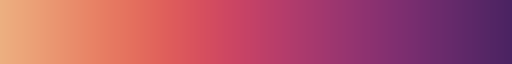

In [29]:
sns.color_palette("flare", as_cmap=True)

### Bar
The built-in `bar` style is useful for displaying mini-charts within cell backgrounds of the DataFrame.

In [30]:
# Generate mini bar charts
df.style.bar(color='lightblue')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


There are other parameters in `bar()` that lets us adjust the display of these bar charts. For example, we can modify its height, width, and alignment, as shown in the code and comments below:

In [31]:
# Further display adjustments of mini bar charts
df.style.bar(color='lightblue',
             width=75, # Percentage of cell, measured from the left, in which to draw the bars. Ranges from 0 to 100
             height=70, # Percentage height of bar in the cell, centrally aligned. Ranges from 0 to 100
             align='zero' # Defines how to align bars within cells relative to a width adjusted center. Default is 'mid'
            )

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


We can see that just these three parameters (`width`, `height`, and `align`) alone can let us make major changes to how these mini charts are displayed. The `align` parameter defines how to align the bars within the cells relative to a width adjusted center, and it takes a range of arguments such as `mid` (default), `zero`, `left`, `right`, and `mean`.

If we wish to provide more granular style adjustments, we can also use the `props` parameter to specify the CSS specification. However, an important thing to take note is that the `props` parameter override the settings defined in the `width` parameter, as seen in the example below. It is because the `props` parameters come with the CSS setting of `width:10em;` by default.

In [32]:
# Include CSS specifications
df.style.bar(color='lightblue',
             width=75,
             height=70, 
             align='zero',
             props='font-weight:bold;' # Include CSS specification
            )

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


> **Note**: The `vmin` and `vmax` parameters seen in `background_gradient` and `text_gradient` are present in `bar()` as well.

### Combining styles
A great thing about styling DataFrames is that we can chain multiple style functions together. The following code is a great example of this, where we incorporate data formatting, mini bar chart generation, and text gradients.

In [33]:
# Set numerical columns
numerical_cols = ["Age", "AnnualIncome", "SpendingScore", "WorkExperience", "FamilySize"]

# Implement formatting, bar charts, and text gradients
df_nan.style.format(subset=numerical_cols,
                    formatter='{:.3f}', 
                    na_rep="")\
            .bar(align=0, 
                 cmap="Spectral", 
                 height=50,
                 width=60, 
                 props="width: 120px; border-right: 1px solid black;")\
            .text_gradient(cmap="Set1", vmin=10, vmax=30000)

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19.000,,39.000,Scientist,1.000,4.000
2,Male,,35000.000,,Engineer,3.000,3.000
3,Female,20.000,86000.000,6.000,Engineer,1.000,1.000
4,Female,23.000,59000.000,77.000,Lawyer,0.000,2.000
5,Female,31.000,38000.000,40.000,Artist,,6.000
6,Female,22.000,58000.000,76.000,Engineer,,2.000
7,Female,35.000,31000.000,6.000,Scientist,1.000,3.000


Here is a simpler example if the above one is too complicated:

In [34]:
# Apply background gradient and highlighting maximum values for every column
df.style.background_gradient(cmap='Blues').highlight_max(color='green')

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
CustomerID,,,,,,,
1,Male,19,15000,39,Scientist,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Artist,2,6
6,Female,22,58000,76,Engineer,0,2
7,Female,35,31000,6,Scientist,1,3


___
<a id='section6'></a>
## (6) Style customization with CSS

We have already seen snippets of how CSS provides an effective way to control the visual aspects of DataFrames, helping to enhance the understanding and interpretation of data. Let us now delve deeper into how we can implement granular CSS customizations to our DataFrames.

For a start, here is a table containing ten commonly used CSS properties, along with brief descriptions and examples of how to adjust them.

| Property            | Description                                              | Example usage                   |
|---------------------|----------------------------------------------------------|---------------------------------|
| `color`             | Sets the text color                                      | `color: red;`                   |
| `background-color`  | Sets the background color                                | `background-color: #f0f0f0;`    |
| `font-size`         | Adjusts the font size                                     | `font-size: 16px;`              |
| `font-family`       | Specifies the font family                                 | `font-family: 'Arial', sans-serif;` |
| `margin`            | Sets the margin around elements                           | `margin: 10px 20px;`            |
| `padding`           | Sets the padding inside elements                          | `padding: 5px 10px;`            |
| `border`            | Defines the border style, width, and color                 | `border: 2px solid black;`      |
| `text-align`        | Aligns the text within an element                         | `text-align: center;`           |
| `width`             | Sets the width of an element                               | `width: 50%;`                   |
| `height`            | Sets the height of an element                              | `height: 100px;`                |


There are three primary methods of adding custom CSS styles to `Styler` objects, namely:
- `set_table_styles()`: Controls broader areas of the table with specified internal CSS
- `set_td_classes()`: Either directly link external CSS classes to data cells or link internal CSS classes created by the `set_table_styles()` method
- `apply()` and `applymap()`: Add direct internal CSS to specific data cells

The difference between these customization methods as compared to the conditional formatting techniques is that these CSS customization methods are not dependent on the data in the DataFrame cells. The broader method `set_table_styles()` is  recommended for generic styling (such as entire rows or columns), and are less suitable for individual cell specifications.

Let us look at each one of these three methods in detail.

___
### (i) Set table styles

https://pandas.pydata.org/docs/user_guide/style.html#Acting-on-Data

### (ii) Set table cell styles

In [35]:
talk about applymap etc.

SyntaxError: invalid syntax (2625076846.py, line 1)

### Data

applymap()
apply()

### Index and column headers

applymap_index()  
apply_index() 

map, and map_index?

Set properties: Use Styler.set_properties when the style doesn’t actually depend on the values. This is just a simple wrapper for .applymap where the function returns the same properties for all cells..

https://pandas.pydata.org/docs/user_guide/style.html#Set-properties  

___
<a id='section7'></a>
## (7) Export styled tables

Only the output methods to_html, to_string and to_latex currently work with concatenated Stylers.

Other output methods, including to_excel, do not work with concatenated Stylers.

>Many other styles that are out of scope of this lesson, like tooltips and captions (https://pandas.pydata.org/docs/user_guide/style.html#Tooltips-and-Captions) and optimization https://pandas.pydata.org/docs/user_guide/style.html#Optimization